In [66]:
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# 加载数据
#fu = np.load(r"feature/ZBH/fu_ZBH.npy")
#notfu = np.load(r"feature/ZBH/notfu_ZBH.npy")

f = np.load(r"feature/20.npy")
fu = f[:501]
notfu = f[501:3812]
test = f[3812:3822]

# 训练集和测试集
X_train = fu
X_val = np.concatenate((fu, notfu), axis=0)
y_val = np.concatenate((np.ones(fu.shape[0]), -np.ones(notfu.shape[0])))

f1 = []
best_f1 = 0
best_params = {}

# 网格搜索参数
for nu in np.linspace(0.01, 0.99, 30):
    for kernel in ["linear", "poly", "rbf", "sigmoid"]:
        oneclassclf = make_pipeline(OneClassSVM(nu=nu, kernel=kernel))
        oneclassclf.fit(X_train)

        y_pred = oneclassclf.predict(X_val)
        f1_score_val = f1_score(y_val, y_pred, average="macro")

        f1.append(f1_score_val)

        if f1_score_val > best_f1:
            best_f1 = f1_score_val
            best_params = {'nu': nu, 'kernel': kernel}

        print(f"f1_score: {f1_score_val}, nu: {nu}, kernel: {kernel}")

print("最佳F1分数: ", best_f1)
print("最佳参数: ", best_params)

f1_score: 0.2793415057630638, nu: 0.01, kernel: linear
f1_score: 0.2927616986727376, nu: 0.01, kernel: poly
f1_score: 0.9555508914308369, nu: 0.01, kernel: rbf
f1_score: 0.26284907197208995, nu: 0.01, kernel: sigmoid
f1_score: 0.35029367173002035, nu: 0.04379310344827586, kernel: linear
f1_score: 0.35492628390546754, nu: 0.04379310344827586, kernel: poly
f1_score: 0.9532233634807934, nu: 0.04379310344827586, kernel: rbf
f1_score: 0.3461637910386475, nu: 0.04379310344827586, kernel: sigmoid
f1_score: 0.38031132114360366, nu: 0.07758620689655171, kernel: linear
f1_score: 0.37745722506263846, nu: 0.07758620689655171, kernel: poly
f1_score: 0.9519850866586055, nu: 0.07758620689655171, kernel: rbf
f1_score: 0.38106626165726865, nu: 0.07758620689655171, kernel: sigmoid
f1_score: 0.39233596086912415, nu: 0.11137931034482758, kernel: linear
f1_score: 0.39285657174546995, nu: 0.11137931034482758, kernel: poly
f1_score: 0.9490206296100734, nu: 0.11137931034482758, kernel: rbf
f1_score: 0.3927391

In [67]:
notfu.shape

(3311, 144)

In [68]:
fu.shape

(501, 144)

In [69]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

# 加载数据
# X_train, X_test, y_test = ...

# 根据最佳参数创建OneClassSVM模型
clf = OneClassSVM(nu=best_params['nu'], kernel=best_params['kernel'])

# 训练模型
clf.fit(X_train)

# 在测试集上进行预测
y_pred = clf.predict(X_val)

In [70]:
from sklearn.metrics import f1_score

print(f1_score(y_val, y_pred, average="macro"))
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

0.9555508914308369


array([[3259,   52],
       [  27,  474]], dtype=int64)

In [71]:
from sklearn.metrics import classification_report

print('分类报告:') 	#包括准确率、召回率、f1得分等
print(classification_report(y_val, y_pred))

分类报告:
              precision    recall  f1-score   support

        -1.0       0.99      0.98      0.99      3311
         1.0       0.90      0.95      0.92       501

    accuracy                           0.98      3812
   macro avg       0.95      0.97      0.96      3812
weighted avg       0.98      0.98      0.98      3812



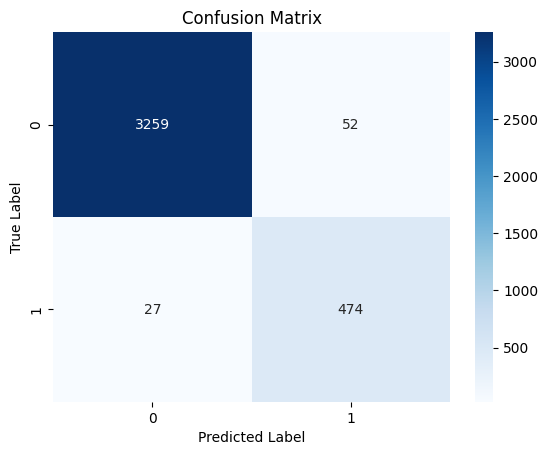

In [72]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_val, y_pred)

# 使用Seaborn绘制混淆矩阵的热图
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
#test=np.load(r"feature/ZBH/testfu_ZBH.npy")

In [74]:
clf.predict(test)

array([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1], dtype=int64)